
Training with SGD:

Training with Adam:


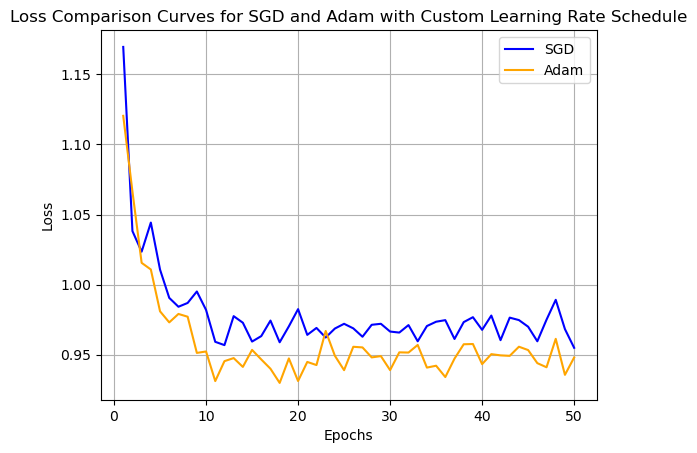

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dropout(0.2),
        layers.Dense(20, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])
    return model

def custom_lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    elif epoch < 30:
        return lr * 0.5
    else:
        return lr * 0.1

def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    lr_scheduler = LearningRateScheduler(custom_lr_schedule)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=0, callbacks=[lr_scheduler])
    
    return history.history['loss']

X, y = create_data()

model_sgd = create_model()
model_adam = create_model()

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32

print("\nTraining with SGD:")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam:")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison Curves for SGD and Adam with Custom Learning Rate Schedule')
plt.grid(True)
plt.show()
